#PROBLEM STATEMENT

# The dataset belongs to a life insurance company. The problem statement is to predict the bonus for its agents.

Importing all the required modules

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

Reading the file

In [2]:
df=pd.read_excel("Sales.xlsx",sheet_name='Sales')
df

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0


Gathering data from the file

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [4]:
df.describe(include='all')

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
count,4.520000e+03,4520.000000,4251.000000,4294.000000,4520,4520,4520,4520,4520.000000,4520,4475.000000,4520,4284.000000,4520.000000,4336.000000,4.366000e+03,4520,4520,4520.000000,4468.000000
unique,NaN,NaN,NaN,NaN,3,5,7,3,NaN,6,NaN,4,NaN,NaN,NaN,NaN,4,4,NaN,NaN
top,NaN,NaN,NaN,NaN,Agent,Salaried,Graduate,Male,NaN,Manager,NaN,Married,NaN,NaN,NaN,NaN,West,Half Yearly,NaN,NaN
freq,NaN,NaN,NaN,NaN,3194,2192,1870,2688,NaN,1620,NaN,2268,NaN,NaN,NaN,NaN,2566,2656,NaN,NaN
mean,7.002260e+06,4077.838274,14.494707,14.469027,NaN,NaN,NaN,NaN,3.688938,NaN,3.565363,NaN,22890.309991,0.287168,4.130074,6.199997e+05,NaN,NaN,4.626991,3.067592
std,1.304956e+03,1403.321711,9.037629,8.963671,NaN,NaN,NaN,NaN,1.015769,NaN,1.455926,NaN,4885.600757,0.452491,3.346386,2.462348e+05,NaN,NaN,3.620132,1.382968
min,7.000000e+06,1605.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,16009.000000,0.000000,1.000000,1.685360e+05,NaN,NaN,0.000000,1.000000
25%,7.001130e+06,3027.750000,7.000000,7.000000,NaN,NaN,NaN,NaN,3.000000,NaN,2.000000,NaN,19683.500000,0.000000,2.000000,4.394432e+05,NaN,NaN,2.000000,2.000000
50%,7.002260e+06,3911.500000,13.000000,13.000000,NaN,NaN,NaN,NaN,4.000000,NaN,4.000000,NaN,21606.000000,0.000000,3.000000,5.789765e+05,NaN,NaN,3.000000,3.000000
75%,7.003389e+06,4867.250000,20.000000,20.000000,NaN,NaN,NaN,NaN,4.000000,NaN,5.000000,NaN,24725.000000,1.000000,6.000000,7.582360e+05,NaN,NaN,8.000000,4.000000


In [5]:
df.shape

(4520, 20)

Removing unwanted rows and columns from the file

In [6]:
df=df.dropna()
df=df.drop(columns=['CustID'])

Checking whether any changes have been made to the data

In [7]:
df.shape

(3447, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3447 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            3447 non-null   int64  
 1   Age                   3447 non-null   float64
 2   CustTenure            3447 non-null   float64
 3   Channel               3447 non-null   object 
 4   Occupation            3447 non-null   object 
 5   EducationField        3447 non-null   object 
 6   Gender                3447 non-null   object 
 7   ExistingProdType      3447 non-null   int64  
 8   Designation           3447 non-null   object 
 9   NumberOfPolicy        3447 non-null   float64
 10  MaritalStatus         3447 non-null   object 
 11  MonthlyIncome         3447 non-null   float64
 12  Complaint             3447 non-null   int64  
 13  ExistingPolicyTenure  3447 non-null   float64
 14  SumAssured            3447 non-null   float64
 15  Zone                 

Plotting a graph between MONTHLY INCOME and AGENT BONUS


Text(0, 0.5, 'AGENT BONUS')

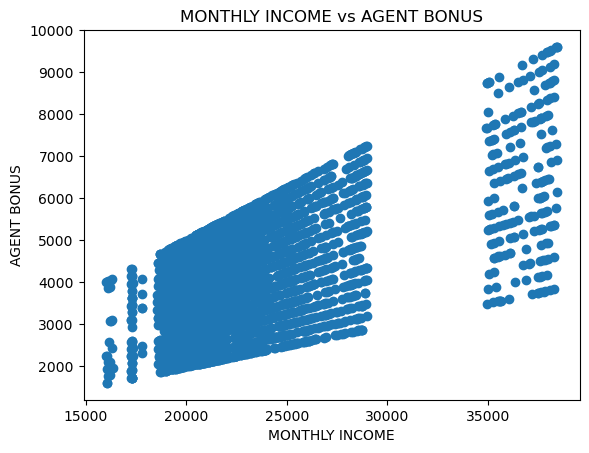

In [9]:
plt.scatter(df.MonthlyIncome, df.AgentBonus)
plt.title("MONTHLY INCOME vs AGENT BONUS")
plt.xlabel('MONTHLY INCOME')
plt.ylabel('AGENT BONUS')

Plotting a graph between CUSTOMER CARE SCORE and AGENT BONUS

Text(0, 0.5, 'AGENT BONUS')

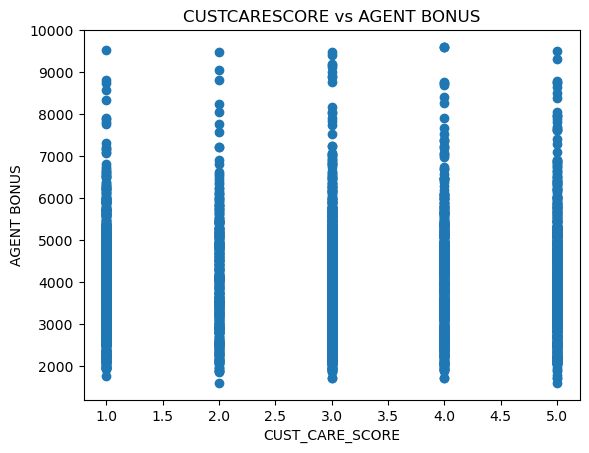

In [10]:
plt.scatter(df.CustCareScore, df.AgentBonus,)
plt.title("CUSTCARESCORE vs AGENT BONUS")
plt.xlabel('CUST_CARE_SCORE')
plt.ylabel('AGENT BONUS')

Plotting a graph between DESIGNATION and AGENT BONUS

Text(0, 0.5, 'AGENT BONUS')

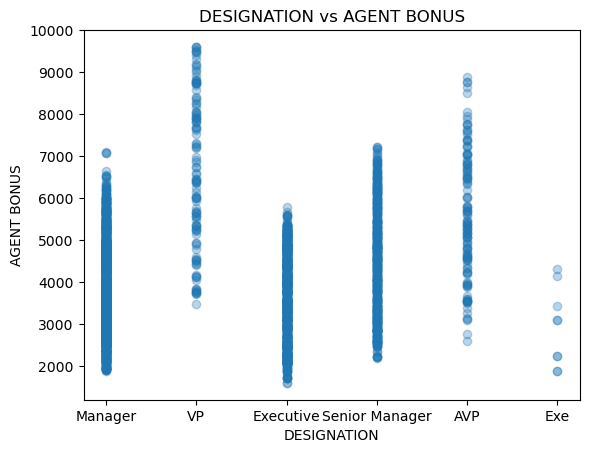

In [11]:
plt.scatter(df.Designation, df.AgentBonus,alpha=0.3)
plt.title("DESIGNATION vs AGENT BONUS")
plt.xlabel('DESIGNATION')
plt.ylabel('AGENT BONUS')

Detailed viewing of data

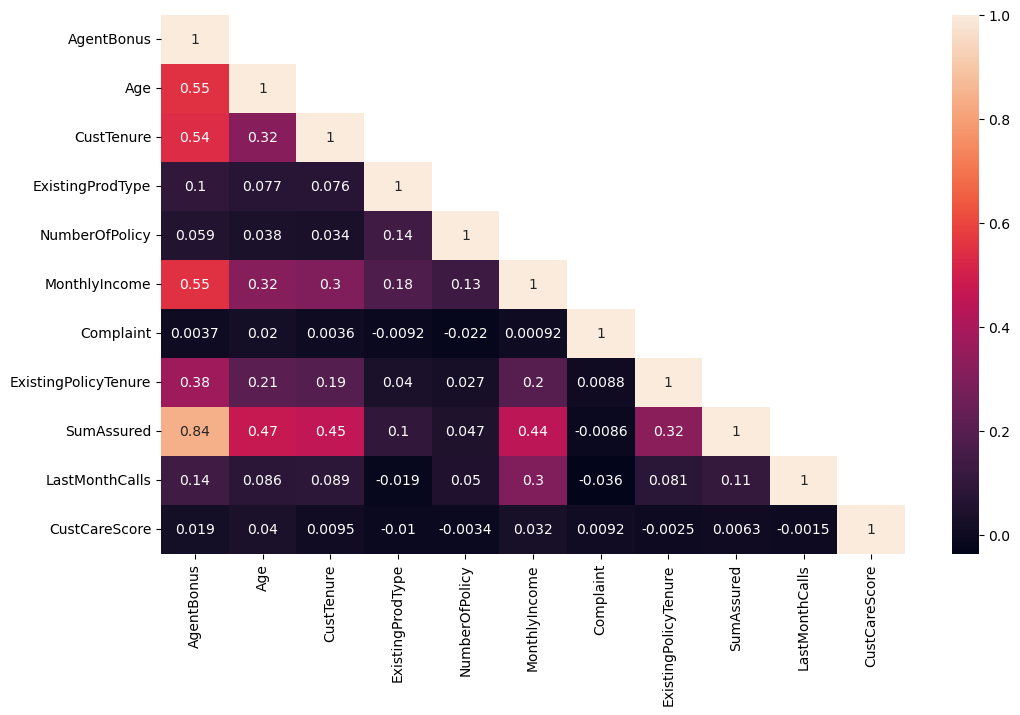

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

Checking for any duplicate rows

In [13]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(3447, 19)


Updating all values into their respective integer representation for easier handling of data

In [14]:
df['MaritalStatus']=np.where(df['MaritalStatus'] =='Divorced', 0, df['MaritalStatus'])
df['MaritalStatus']=np.where(df['MaritalStatus'] =='Single', 0, df['MaritalStatus'])
df['MaritalStatus']=np.where(df['MaritalStatus'] =='Unmarried', 0, df['MaritalStatus'])
df['MaritalStatus']=np.where(df['MaritalStatus'] =='Single', 0, df['MaritalStatus'])
df['MaritalStatus']=np.where(df['MaritalStatus'] =='Married', 1, df['MaritalStatus'])


In [15]:
df['EducationField']=np.where(df['EducationField'] =='Under Graduate', '1', df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='UG', '1', df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='Graduate', '2', df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='Engineer', '2', df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='Post Graduate', '3', df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='Diploma', '3', df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='MBA', '3', df['EducationField'])

In [16]:
df['Gender']=np.where(df['Gender'] =='Male', 1, df['Gender'])
df['Gender']=np.where(df['Gender'] =='Female', 0, df['Gender'])
df['Gender']=np.where(df['Gender'] =='Fe male', 0, df['Gender'])

In [17]:
df['Zone']=np.where(df['Zone'] =='North', 1, df['Zone'])
df['Zone']=np.where(df['Zone'] =='West', 2, df['Zone'])
df['Zone']=np.where(df['Zone'] =='East', 3, df['Zone'])
df['Zone']=np.where(df['Zone'] =='South', 4, df['Zone'])

In [18]:
df['Designation']=np.where(df['Designation'] =='Manager', 1, df['Designation'])
df['Designation']=np.where(df['Designation'] =='Executive', 2, df['Designation'])
df['Designation']=np.where(df['Designation'] =='Exe', 2, df['Designation'])
df['Designation']=np.where(df['Designation'] =='Senior Manager', 3, df['Designation'])
df['Designation']=np.where(df['Designation'] =='AVP', 4, df['Designation'])
df['Designation']=np.where(df['Designation'] =='VP', 2, df['Designation'])

In [19]:
df['Occupation']=np.where(df['Occupation'] =='Free Lancer', 1, df['Occupation'])
df['Occupation']=np.where(df['Occupation'] =='Small Business', 2, df['Occupation'])
df['Occupation']=np.where(df['Occupation'] =='Salaried', 3, df['Occupation'])
df['Occupation']=np.where(df['Occupation'] =='Large Business', 4, df['Occupation'])
df['Occupation']=np.where(df['Occupation'] =='Laarge Business', 4, df['Occupation'])

In [20]:
df['Channel']=np.where(df['Channel'] =='Third Party Partner', 1, df['Channel'])
df['Channel']=np.where(df['Channel'] =='Online', 2, df['Channel'])
df['Channel']=np.where(df['Channel'] =='Agent', 3, df['Channel'])

In [21]:
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Quarterly', 4, df['PaymentMethod'])
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Half Yearly', 2, df['PaymentMethod'])
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Yearly', 1, df['PaymentMethod'])
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Monthly', 12, df['PaymentMethod'])

Converting EducationField values from string to float

In [22]:
df['EducationField'] = df['EducationField'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3447 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            3447 non-null   int64  
 1   Age                   3447 non-null   float64
 2   CustTenure            3447 non-null   float64
 3   Channel               3447 non-null   object 
 4   Occupation            3447 non-null   object 
 5   EducationField        3447 non-null   int64  
 6   Gender                3447 non-null   object 
 7   ExistingProdType      3447 non-null   int64  
 8   Designation           3447 non-null   object 
 9   NumberOfPolicy        3447 non-null   float64
 10  MaritalStatus         3447 non-null   object 
 11  MonthlyIncome         3447 non-null   float64
 12  Complaint             3447 non-null   int64  
 13  ExistingPolicyTenure  3447 non-null   float64
 14  SumAssured            3447 non-null   float64
 15  Zone                 

In [23]:
df

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,3,3,2,0,3,1,2.0,0,20993.0,1,2.0,806761.0,1,2,5,2.0
1,2214,11.0,2.0,1,3,2,1,4,1,4.0,0,20130.0,0,3.0,294502.0,1,1,7,3.0
6,3850,12.0,23.0,3,3,2,1,4,2,3.0,0,34999.0,0,2.0,392689.0,1,1,9,2.0
7,2073,6.0,4.0,3,2,1,0,3,2,4.0,0,17279.0,0,2.0,369079.0,2,2,3,3.0
8,2719,8.0,11.0,3,3,2,1,4,1,3.0,0,20916.0,1,1.0,405143.0,2,1,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,2541,10.0,3.0,1,3,3,0,2,1,6.0,1,23096.0,0,5.0,276921.0,2,1,14,5.0
4515,3953,4.0,8.0,3,2,2,1,4,3,2.0,0,26355.0,0,2.0,636473.0,2,1,9,1.0
4516,2939,9.0,9.0,3,3,1,0,2,2,2.0,1,20991.0,0,3.0,296813.0,1,1,1,3.0
4518,4816,10.0,10.0,2,2,2,0,4,2,2.0,0,20068.0,0,6.0,943999.0,2,2,1,5.0


In [24]:
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,3,3,2,0,3,1,2.0,0,20993.0,1,2.0,806761.0,1,2,5,2.0
1,2214,11.0,2.0,1,3,2,1,4,1,4.0,0,20130.0,0,3.0,294502.0,1,1,7,3.0
6,3850,12.0,23.0,3,3,2,1,4,2,3.0,0,34999.0,0,2.0,392689.0,1,1,9,2.0
7,2073,6.0,4.0,3,2,1,0,3,2,4.0,0,17279.0,0,2.0,369079.0,2,2,3,3.0
8,2719,8.0,11.0,3,3,2,1,4,1,3.0,0,20916.0,1,1.0,405143.0,2,1,1,4.0


/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


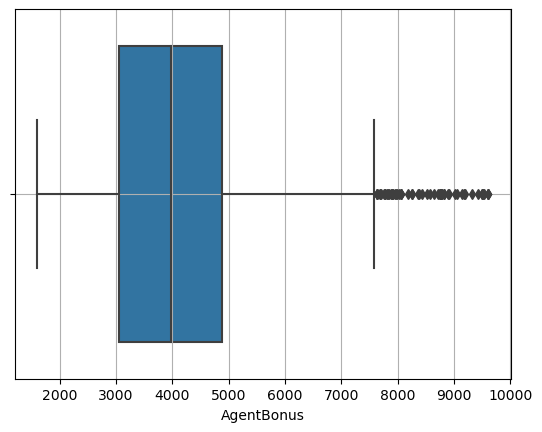

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


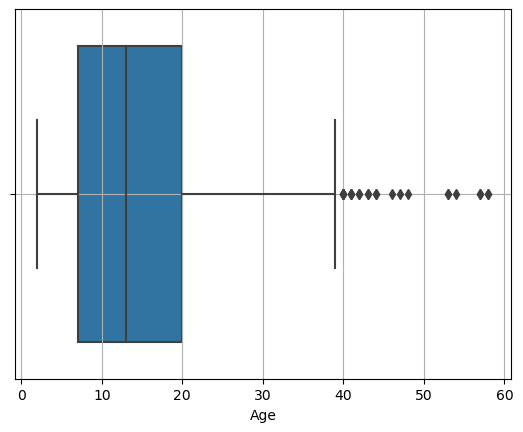

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


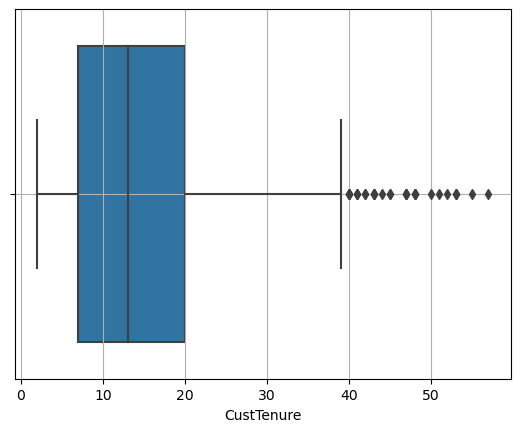

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


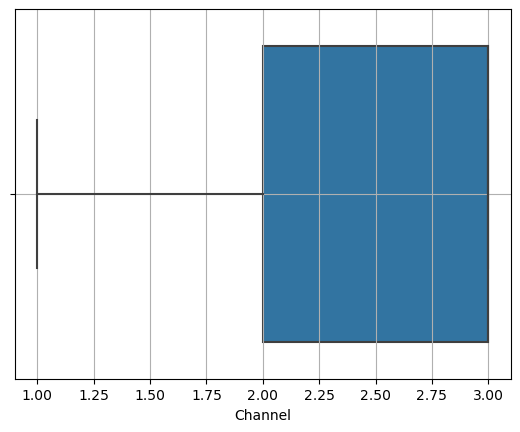

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


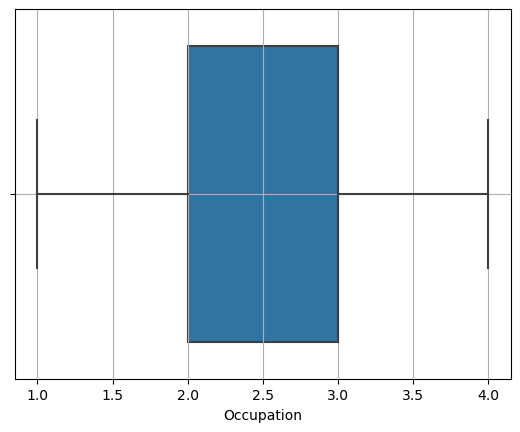

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


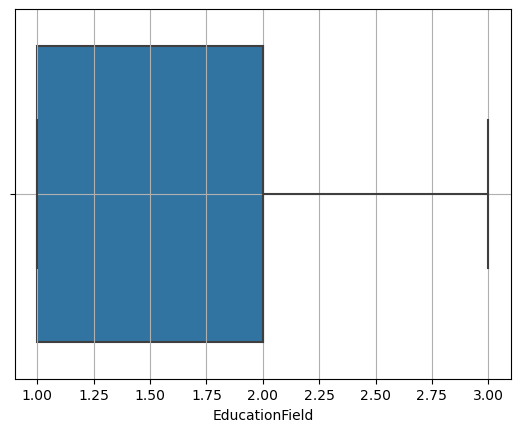

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


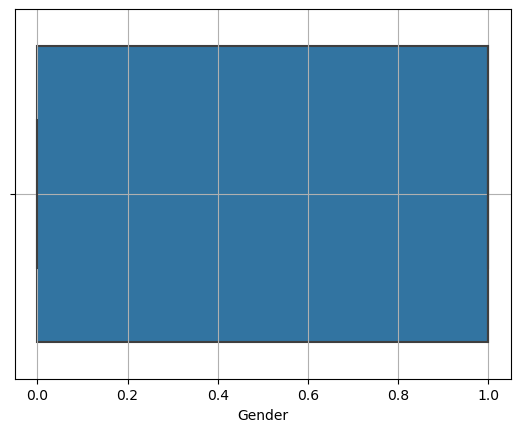

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


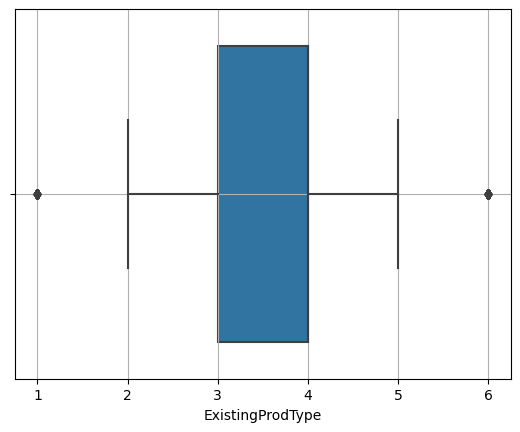

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


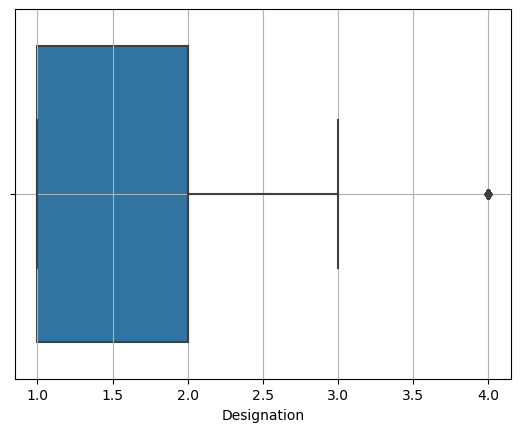

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


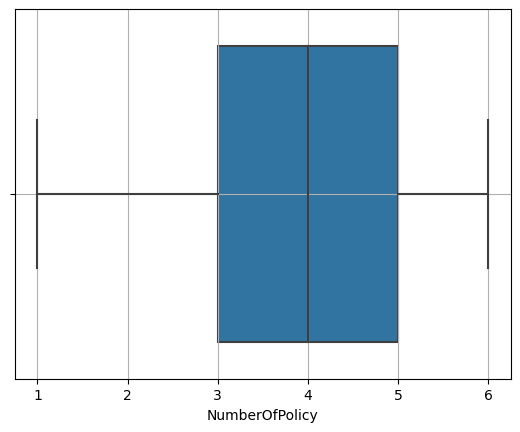

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


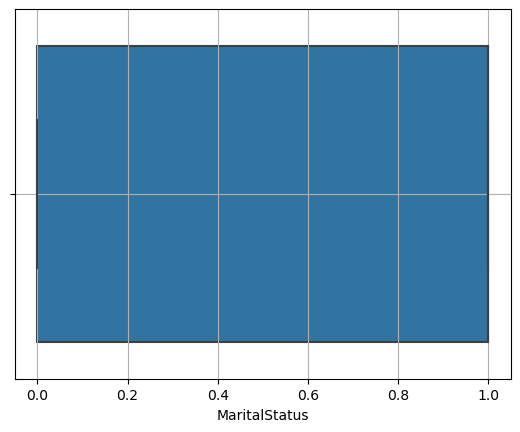

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


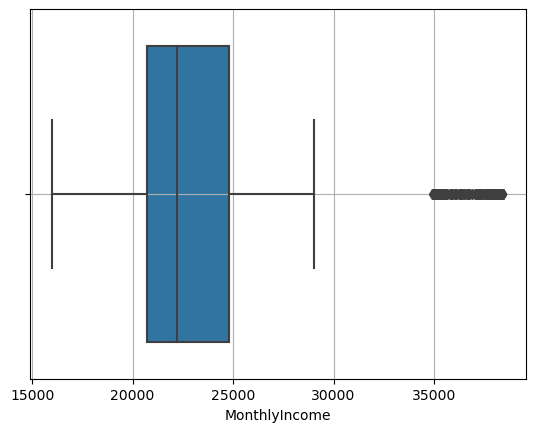

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


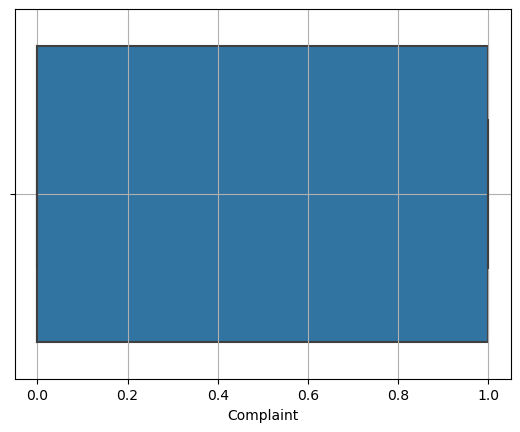

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


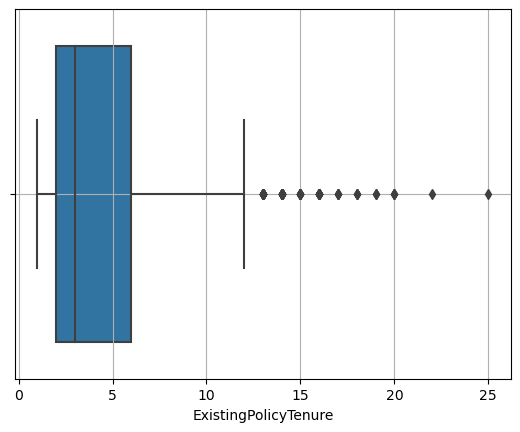

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


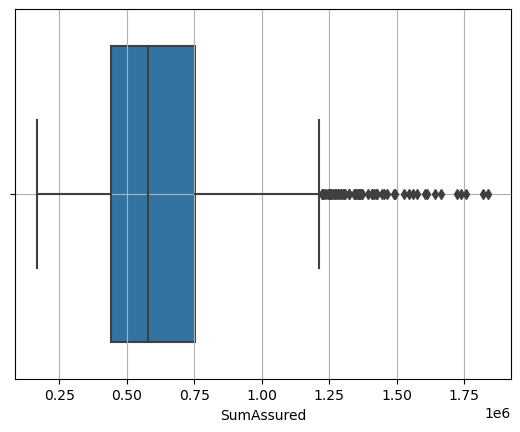

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


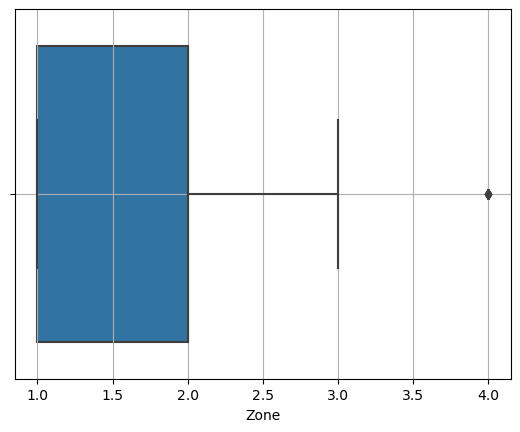

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


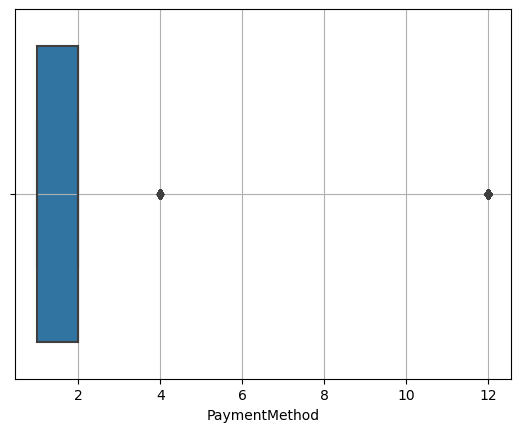

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


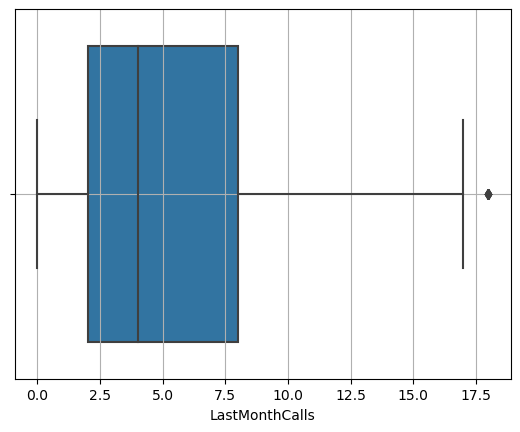

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


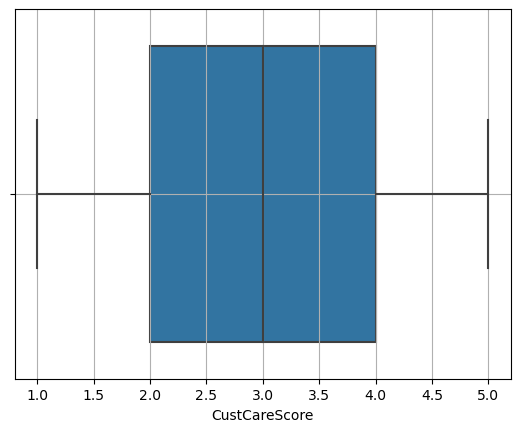

In [25]:
cols = ['AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

Handles what all variables are to be considered for estimating the bonus

In [26]:
le = LabelEncoder()
df['Channel_encoded'] = le.fit_transform(df['Channel'])
#X=dataset.drop(columns=['AgentBonus'])
from sklearn.preprocessing import LabelEncoder
X = df.loc[:,['Age','MonthlyIncome','SumAssured','Gender','Channel','LastMonthCalls','ExistingProdType','Occupation','Complaint','PaymentMethod','Designation','EducationField','Zone','NumberOfPolicy','MaritalStatus','CustTenure', 'Channel_encoded']]
y=df['AgentBonus']

In [27]:
# x=df.iloc[:,:-1].values  
# y=df.iloc[:,-1].values 

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
X_train

,Age,MonthlyIncome,SumAssured,Gender,Channel,LastMonthCalls,ExistingProdType,Occupation,Complaint,PaymentMethod,Designation,EducationField,Zone,NumberOfPolicy,MaritalStatus,CustTenure,Channel_encoded
998,15.0,19374.0,450833.0,0,2,2,4,2,0,1,1,1,2,3.0,1,3.0,1
3145,10.0,20020.0,445845.0,1,3,1,5,3,0,1,2,2,1,4.0,1,14.0,2
120,6.0,24613.0,664551.0,1,3,7,2,2,0,4,3,1,2,2.0,1,31.0,2
1487,14.0,21804.0,308963.0,1,2,7,3,3,1,2,1,2,1,1.0,1,6.0,1
43,4.0,22918.0,599993.0,0,1,1,3,2,0,2,3,1,2,2.0,0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,23.0,24724.0,657658.0,1,3,0,3,3,0,2,3,2,2,5.0,1,5.0,2
4325,31.0,20918.0,554327.0,1,3,8,4,3,1,2,2,2,2,4.0,1,31.0,2
2553,32.0,36657.0,814519.0,1,1,8,4,2,0,2,2,1,2,5.0,0,48.0,0
3593,10.0,21479.0,563609.0,1,3,1,4,3,0,2,2,2,1,5.0,1,10.0,2


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [32]:
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [33]:
y_pred = classifier.predict(X_test)

print(np.concatenate((np.array(y_pred).reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[7214 7111]
 [7214 2862]
 [7214 4115]
 ...
 [7214 5888]
 [7214 4821]
 [7214 5329]]


/Users/rr/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred) 
print(cm)
accuracy_score(y_test,y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.0

In [35]:
df['AgentBonus'] = LE.fit_transform(df['AgentBonus'])
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Channel_encoded
0,1414,22.0,4.0,3,3,2,0,3,1,2.0,0,20993.0,1,2.0,806761.0,1,2,5,2.0,2
1,124,11.0,2.0,1,3,2,1,4,1,4.0,0,20130.0,0,3.0,294502.0,1,1,7,3.0,0
6,1076,12.0,23.0,3,3,2,1,4,2,3.0,0,34999.0,0,2.0,392689.0,1,1,9,2.0,2
7,58,6.0,4.0,3,2,1,0,3,2,4.0,0,17279.0,0,2.0,369079.0,2,2,3,3.0,2
8,396,8.0,11.0,3,3,2,1,4,1,3.0,0,20916.0,1,1.0,405143.0,2,1,1,4.0,2


In [36]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head()

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,AgentBonus,Age,CustTenure,EducationField,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,...,Designation_2,Designation_3,Designation_4,MaritalStatus_1,Zone_2,Zone_3,Zone_4,PaymentMethod_2,PaymentMethod_4,PaymentMethod_12
0,1414,22.0,4.0,2,3,2.0,20993.0,1,2.0,806761.0,...,0,0,0,0,0,0,0,1,0,0
1,124,11.0,2.0,2,4,4.0,20130.0,0,3.0,294502.0,...,0,0,0,0,0,0,0,0,0,0
6,1076,12.0,23.0,2,4,3.0,34999.0,0,2.0,392689.0,...,1,0,0,0,0,0,0,0,0,0
7,58,6.0,4.0,1,3,4.0,17279.0,0,2.0,369079.0,...,1,0,0,0,1,0,0,1,0,0
8,396,8.0,11.0,2,4,3.0,20916.0,1,1.0,405143.0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
classifier.score(X_train,y_train)

0.6913311570547697

In [38]:
df['EducationField'].value_counts()

2    1697
1    1075
3     675
Name: EducationField, dtype: int64

In [39]:
X.iloc[0,:]

Age                     22.0
MonthlyIncome        20993.0
SumAssured          806761.0
Gender                     0
Channel                    3
LastMonthCalls             5
ExistingProdType           3
Occupation                 3
Complaint                  1
PaymentMethod              2
Designation                1
EducationField             2
Zone                       1
NumberOfPolicy           2.0
MaritalStatus              0
CustTenure               4.0
Channel_encoded            2
Name: 0, dtype: object

### Predicting the result

In [40]:
classifier.predict([[22,20993,806761,0,3,5,3,2,1,1,2,1,2,2,0,4,2]])

array([7214])

Checks the efficiency of the estimator

In [41]:
classifier.score(X_train,y_train)

0.6913311570547697